In [1]:
# =======================
# 1. Import Libraries
# =======================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

# =======================
# 2. Load Dataset 
# =======================

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2         # 80% training, 20% testing
)

train_data = datagen.flow_from_directory(
    "Manish/Dataset",                   # same folder
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_data = datagen.flow_from_directory(
    "Manish/dataset",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# =======================
# 3. Build Model
# =======================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same',
           input_shape=(128, 128, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same', 
           kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same',
           kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# =======================
# 4. Compile the Model
# =======================
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# =======================
# 5. Train the Model
# =======================
model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# =======================
# 6. Save Model
# =======================
model.save("student_cnn_model.h5")

# =======================
# 7. Evaluate Model
# =======================
loss, acc = model.evaluate(test_data)
print("Test Accuracy:", acc)
print("Test Loss:", loss)


Found 17 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6471 - loss: 1.5429 - val_accuracy: 1.0000 - val_loss: 0.7055
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step - accuracy: 1.0000 - loss: 0.3899 - val_accuracy: 1.0000 - val_loss: 0.7210
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.3943 - val_accuracy: 0.5000 - val_loss: 0.7588
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.3994 - val_accuracy: 0.5000 - val_loss: 0.8128
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.4047 - val_accuracy: 0.5000 - val_loss: 0.8868
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4099 - val_accuracy: 0.5000 - val_loss: 0.9780
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step - accuracy: 1.0000 - loss: 0.4151 - val_accuracy: 0.5000 - val_loss: 1.0844
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - accuracy: 1.0000 - loss: 0.4200 - val_accuracy: 0.5000 - val_loss: 1.2016
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5000 - loss: 1.5059
Test Accuracy: 0.5
Test Loss: 1.5058956146240234


In [6]:
img_path = "Manish/Dataset/Manish/2.jpeg"

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_name = list(train_data.class_indices.keys())[class_index]

print("Predicted Class:", class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: Akash


In [1]:
# =======================
# 1. Import Libraries
# =======================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.preprocessing import image

# =======================
# 2. Data Loading + Strong Augmentation
# =======================
datagen = ImageDataGenerator(
    rescale=1./255,

    rotation_range=25,
    zoom_range=0.25,
    shear_range=0.25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],

    validation_split=0.2     # use same folder for test split
)

train_data = datagen.flow_from_directory(
    "Manish/Dataset",               # <-- your folder
    target_size=(128, 128),
    batch_size=16,           # SMALL DATASET → small batch
    class_mode='categorical',
    subset="training"
)

test_data = datagen.flow_from_directory(
    "Manish/Dataset",
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset="validation"
)

# =======================
# 3. Simplified CNN Model (Best for Few Images)
# =======================
model = Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.6),                  # high dropout for small dataset

    Dense(train_data.num_classes, activation='softmax')
])

# =======================
# 4. Compile Model
# =======================
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# =======================
# 5. Early Stopping (Avoid Overfitting)
# =======================
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# =======================
# 6. Train Model
# =======================
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=30,
    callbacks=[early_stop]
)

# =======================
# 7. Save Model
# =======================
model.save("small_dataset_cnn.h5")
print("Model Saved Successfully!")

# =======================
# 8. S     ave Training Results
# =======================
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

with open("training_results.txt", "w") as f:
    f.write(f"Training Accuracy: {train_acc}\n")
    f.write(f"Validation Accuracy: {val_acc}\n")
    f.write(f"Training Loss: {train_loss}\n")
    f.write(f"Validation Loss: {val_loss}\n")

print("Training results saved in training_results.txt")

# =======================
# 9. Single Image Prediction
# =======================
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = list(train_data.class_indices.keys())[class_index]

    print("Predicted Class:", class_name)
    return class_name

# Example:
predict_image("Manish/Dataset/Manish/1.jpeg")


Found 17 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9412 - loss: 0.2685 - val_accuracy: 0.5000 - val_loss: 0.5689
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 1.0000 - loss: 8.4147e-07 - val_accuracy: 0.5000 - val_loss: 1.0007
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.9388
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 1.0000 - loss: 1.4025e-08 - val_accuracy: 0.5000 - val_loss: 0.9721


Model Saved Successfully!
Training results saved in training_results.txt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Predicted Class: Akash


'Akash'

In [11]:
# ================================
#  FULL CNN TRAINING SCRIPT
#  Auto-Augmentation + Training + Prediction
# ================================

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --------------------------------
# STEP 1: DATASET PATH
# --------------------------------
dataset_path = "Manish/Dataset/"   

# --------------------------------
# STEP 2: COUNT IMAGES & ADJUST AUGMENTATION
# --------------------------------
total_images = sum([len(files) for r, d, files in os.walk(dataset_path)])
print("\nTotal images found:", total_images)

# Auto adjust augmentation
if total_images < 50:
    aug_factor = 0.30
elif total_images < 200:
    aug_factor = 0.20
else:
    aug_factor = 0.10

print("Augmentation Strength =", aug_factor, "\n")

# --------------------------------
# STEP 3: IMAGE DATA GENERATOR
# --------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25 * aug_factor,
    zoom_range=0.25 * aug_factor,
    shear_range=0.25 * aug_factor,
    width_shift_range=0.15 * aug_factor,
    height_shift_range=0.15 * aug_factor,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',      # padding enabled
    validation_split=0.2      # use same folder for validation
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

# --------------------------------
# STEP 4: CREATE CNN MODEL
# --------------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())

# --------------------------------
# STEP 5: TRAIN MODEL
# --------------------------------
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[es]
)

# --------------------------------
# STEP 6: SAVE MODEL
# --------------------------------
model.save("student_model.h5")
print("\nModel saved as student_model.h5")

# --------------------------------
# STEP 7: PREDICTION ON SAMPLE IMAGE
# --------------------------------
sample_image = None

# auto-pick one image from dataset "first class folder"
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        if len(files) > 0:
            sample_image = os.path.join(class_path, files[0])
            break

if sample_image:
    print("\nTesting prediction on:", sample_image)

    img = load_img(sample_image, target_size=(224,224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = list(train_gen.class_indices.keys())[class_index]

    print("Predicted Class:", class_name)

else:
    print("\nNo sample image found for testing!")




Total images found: 21
Augmentation Strength = 0.3 

Found 17 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,938,690 (49.36 MB)

 Trainable params: 12,938,690 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.5294 - loss: 1.0019 - val_accuracy: 0.5000 - val_loss: 1.1290
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.5882 - loss: 1.2886 - val_accuracy: 1.0000 - val_loss: 0.1062
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.9412 - loss: 0.1491 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 6.7651e-06
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 683ms/step - accuracy: 1.0000 - loss: 2.8416e-04 - val_accuracy: 1.0000 - val_loss: 2.9802e-07
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 1.0000 - loss: 4.7684e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step - accuracy: 1.0000 - loss: 7.0123e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - accuracy: 1.0000 - loss: 7.0123e-


Model saved as student_model.h5

Testing prediction on: Manish/Dataset/Akash\1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Class: Akash



------ Prediction 1 ------
Selected Image: Manish/Dataset/Manish\4.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Class: Manish


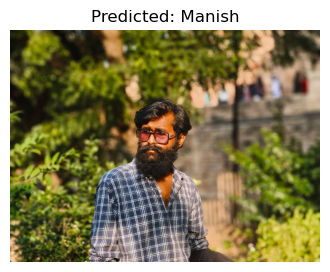


------ Prediction 2 ------
Selected Image: Manish/Dataset/Akash\9.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: Akash


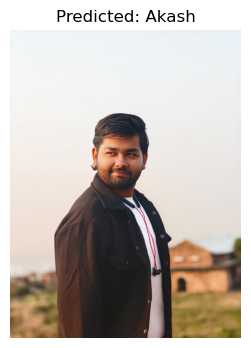


------ Prediction 3 ------
Selected Image: Manish/Dataset/Manish\3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: Manish


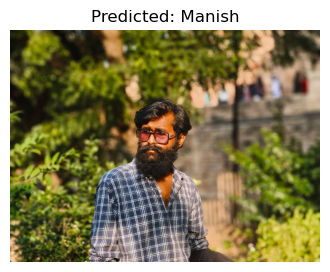


------ Prediction 4 ------
Selected Image: Manish/Dataset/Manish\3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Class: Manish


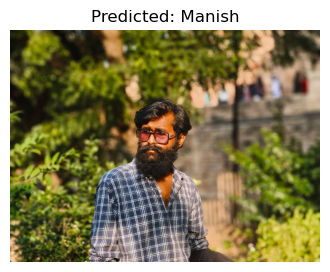


------ Prediction 5 ------
Selected Image: Manish/Dataset/Akash\10.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Class: Akash


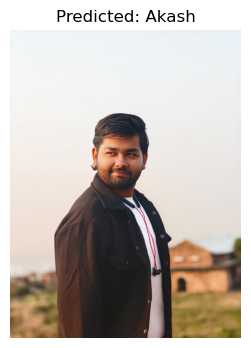

In [13]:
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os

# ----------------------------------------------------
# 1. Load your saved model
# ----------------------------------------------------
model = load_model("student_model.h5")

# Path to your dataset
dataset_path = "Manish/Dataset/"   # same folder used during training

# ----------------------------------------------------
# 2. Class folders
# ----------------------------------------------------
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

class_names = sorted(class_folders)   # sort alphabetically

# ----------------------------------------------------
# 3. Predict 5 random images
# ----------------------------------------------------
num_predictions = 5

for i in range(num_predictions):
    print(f"\n------ Prediction {i+1} ------")

    # Pick random class
    random_class = random.choice(class_folders)
    class_path = os.path.join(dataset_path, random_class)

    # Pick random image from class
    images = os.listdir(class_path)
    random_image = random.choice(images)
    image_path = os.path.join(class_path, random_image)

    print("Selected Image:", image_path)

    # Load + preprocess
    img = load_img(image_path, target_size=(224,224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    predicted_class = class_names[class_index]

    print("Predicted Class:", predicted_class)

    # Display image
    plt.figure(figsize=(4,4))
    plt.imshow(load_img(image_path))
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
